# Liverpool Assignment
- Installing Packages
- Preparing and Exploring the Dataset
- Unsupervised Learning
- Supervised Learning

## Installing packages

In [168]:
#tells matplotlib to use the inline backend which renders the graphs in the notebook

%matplotlib inline 

#imports the packages needed and renames some for convenience 

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed

import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler


## Importing the dataset

For this assignment I used the "Student Performance Data Set" from the UCI Machine Learning archive (https://archive.ics.uci.edu/ml/datasets/student+performance#).

This is two datasets on educational performance at two schools in Portugal.

The first dataset is on performance in maths (n = 395), the second is on performance in Portugese (n = 649). 

Whilst students in the first dataset *seem* to be present in the second dataset, the data appears to be have been gathered at different times in the year and for a small number of students certain attributes have changed which makes a join of the datasets of questionable validity.

I will therefore focus on the larger portugese acheivement dataset, I will however investigate whether the predictors of sucess are similar for maths and portugese. In particular I will look at whether being sucessful maths predicts sucess in portugese. 


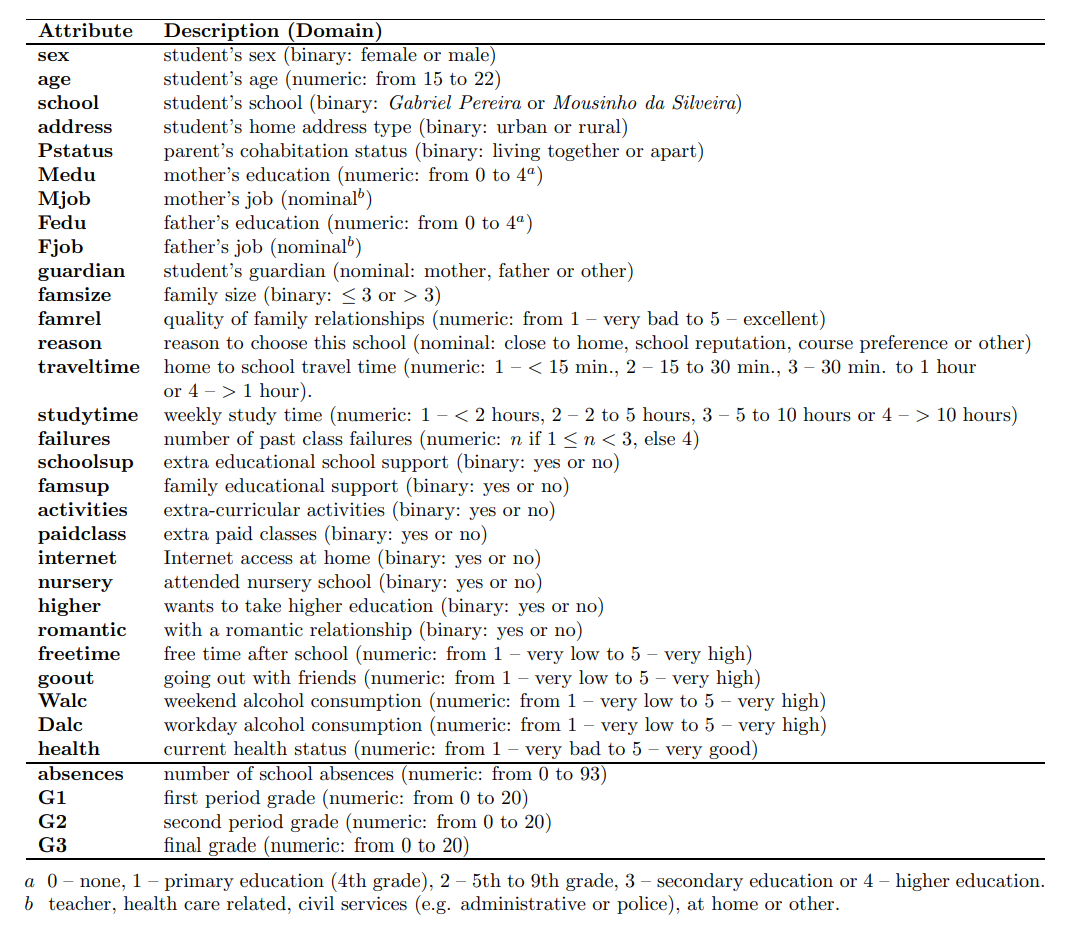

In [169]:
Image("../Liverpool Assignment/Attribute_table.png")

In [170]:
#uses read_csv from pandas to import read in the csv file
db_port = pd.read_csv("../Liverpool Assignment/Data/student-por.csv", sep = ";", header = 0)

#uses pandas' describe function to provide descriptive statistics on our variables, categorical variables are included by setting the 'include' to 'all'. 
db_port.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649,NaN,NaN,NaN,16.7442,1.21814,15,16,17,18,22
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649,NaN,NaN,NaN,2.51464,1.13455,0,2,2,4,4
Fedu,649,NaN,NaN,NaN,2.30663,1.09993,0,1,2,3,4
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Exploring the dataset

Visually inspecting the table above, some outliers stand out. 
For example whilst the average age is ~16.7, however the maximum age is 22

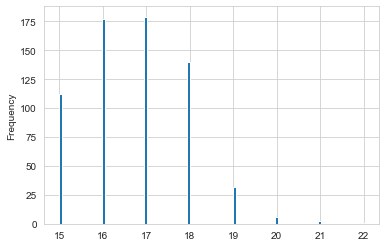

In [171]:
db_port["age"].plot.hist(bins=100) #plots a histogram with 100 bins of the frequncency of the values of the variable age from the data frame db_port

We can see that most students are between 15 and 19, however the number of students who are 20 and older in unclear from this plot, so we can instead use value_counts from pandas to return a table  

In [172]:
db_port["age"].value_counts(ascending = True) #provides a table of the 

22      1
21      2
20      6
19     32
15    112
18    140
16    177
17    179
Name: age, dtype: int64

In [173]:
db_port.query("age > 19")\
        [["age", "G3", "failures", "absences", "health"]]

,age,G3,failures,absences,health
279,22,5,3,12,1
299,20,12,0,8,2
351,20,15,2,0,5
407,21,12,2,0,5
413,21,10,2,21,4
414,20,15,0,8,3
421,20,10,1,5,5
506,20,10,1,8,3
574,20,10,1,12,4


In [174]:
#queries the database for individuals of age 20 and 21
#specifies that it is the G3 variable that should be extracted
#calculates the mean
db_port.query("22 > age > 19")\
        ["G3"]\
        .mean() 

11.75

We can see here that the only 22 year old has very bad health, a high number of absences, and poor grades.
The other older students have grades within a stadard deviation of the average (11.9).


We can also explore other relationships within the data by creating new variables, for example G3 is the students final grades and G1 is the students first period grade, a new variable calculated as G1 - G3 could provide insight into how much a student has improved over the year, which we can then compare to variables such as whether the student had received extra paid classes.

In [175]:
db_port2 = db_port.assign(Grade_progress = lambda x: db_port['G3']
                                                -db_port['G1'])

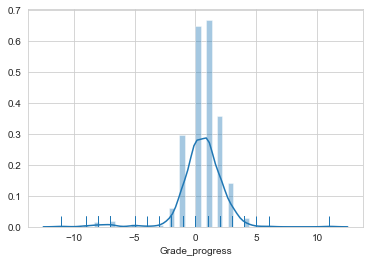

In [176]:
sns.distplot(db_port2["Grade_progress"], 
             rug=True)

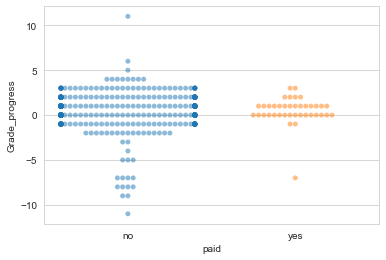

In [177]:
sns.set_style("whitegrid")           #this sets the aesthetic of seaborne plots to whitegrid, which provides a handy line for y = 0
sns.swarmplot(x = "paid",            #calls the swarmplot function from the seaborne package, defines the x axis as the paid variable
              y = "Grade_progress",  #defines the y axis as grade progress
               data = db_port2,      #tells the package what 
              alpha=0.5
             );

We can see from this plot that most students improve their scores over the year, and that students who received extra paid classes are less likely to see their grades drop throughout the year.

## Clustering 

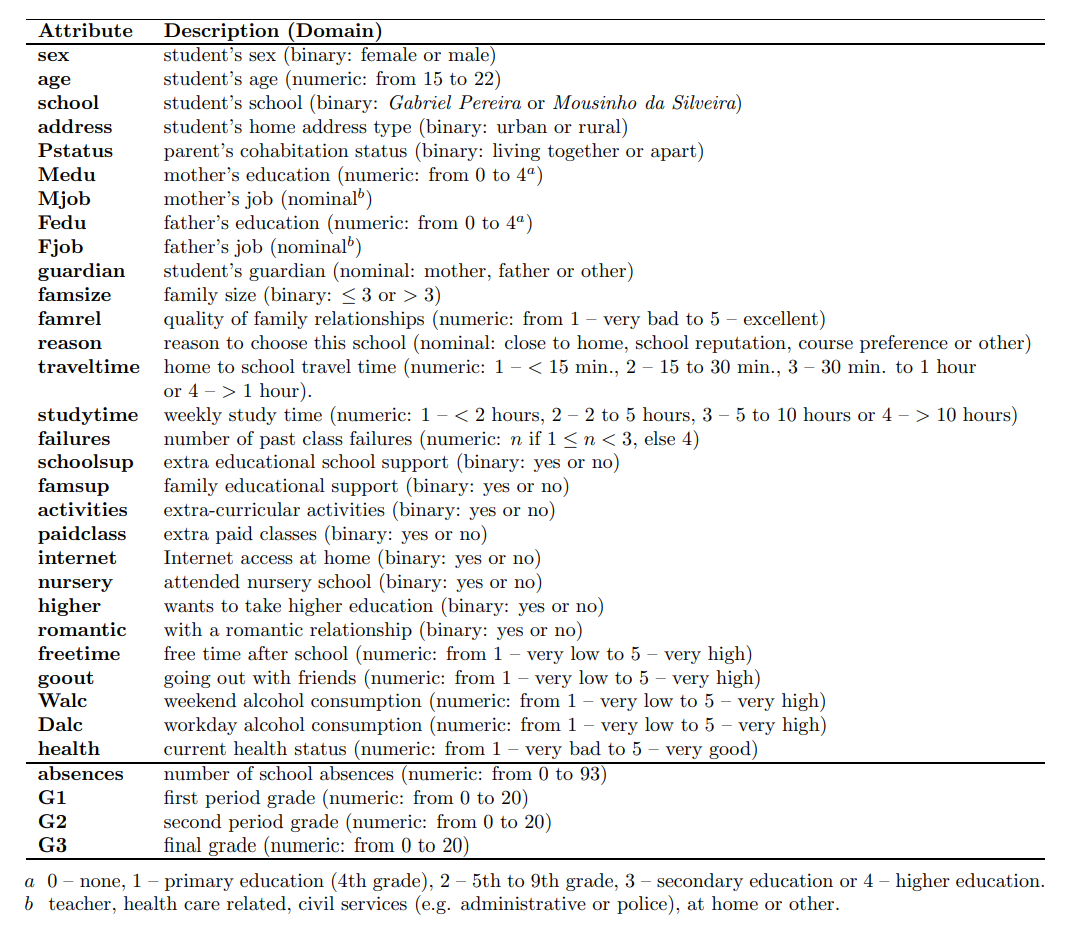

In [178]:
Image("../Liverpool Assignment/Attribute_table.png")

We can see from looking at the above that 111 of the variables relate to the students home and family situation ('address','famsize','Pstatus',
 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime'). It could be fruitfull to apply a clustering algorythm to these variables to test if there are meaningfull groupings of home situations and explore whether these impact outcomes such as grades and absesnces. However of these variables only 4 are numeric ('Medu', 'Fedu' 'famrel','traveltime').
 We can take two approaches here:
 - Fitting a clustering algorythm on the four numerical variables relating to the students homelife.
 - Fitting a more a-theoretical clustering on all the numerical variables.
 
Another option, beyond the scope of this assignment would be to turn all the variables into categorical variable and then using multiple correspondence analysis to project binary and catgeorical variables into components for our clustering in a *meaningful* way.

In [179]:
#Creating scales arrays for the four variables relating to family life, and for all the numerical variables
db_portnum1 = scale(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime']))
db_portnum2 = scale(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']))

#creating dataframes with the scaled vales of our variables of interest
db_portstd1 = pd.DataFrame(db_portnum1, 
                 index = db_port.index,
                 columns = ['Medu', 'Fedu', 'famrel','traveltime']
                )
#db_portstd1

db_portstd2 = pd.DataFrame(db_portnum2, 
                 index = db_port.index,
                 columns = ['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
                )
#db_portstd2

- Fitting a KMeans clustering with 5 clusters on our *unscaled* data.

In [192]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator = KMeans(n_clusters = 5) #creating an KMeans estimator with 5 clusters

estimator.fit(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime'])) #computes kmean clustering for the 4 student household related variables

k5_raw1 = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

estimator.fit(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])) #computes kmean clustering for the numerical variables

k5_raw2 = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above


In [181]:
k5_raw2

0      2
1      4
2      4
3      2
4      2
      ..
644    2
645    3
646    4
647    0
648    0
Length: 649, dtype: int32

- Fitting a KMeans clustering with 5 clusters on our *scaled* data.

In [182]:
estimator.fit(db_portstd1) #computes kmean clustering for the scales values of the 4 student household related variables

k5_std1 = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

estimator.fit(db_portstd2) #computes kmean clustering for the scales values of the numerical variables

k5_std2 = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

- We can also fit a principle componant analysis model, this allows us to project our data into 2 dimensions allowing us new ways of fitting our kmeans clustering algorythm and giving us the ability to visualise our other clusterings.

In [183]:
pca_estimator = PCA(n_components=2)

components1 = pca_estimator.fit_transform(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime']))
components1 = pd.DataFrame(components1,
                              index = db_port.index,
                              columns = ["C-1", "C-2"]
                             )

components2 = pca_estimator.fit_transform(db_port.filter(['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']))
components2 = pd.DataFrame(components2,
                              index = db_port.index,
                              columns = ["C-1", "C-2"]
                             )


In [184]:
estimator.fit(components1)
k5_pca1 = pd.Series(estimator.labels_,
                       index=components1.index
                      )
estimator.fit(components2)
k5_pca2 = pd.Series(estimator.labels_,
                       index=components2.index
                      )

- We can compare these models visually to see if they are similar.

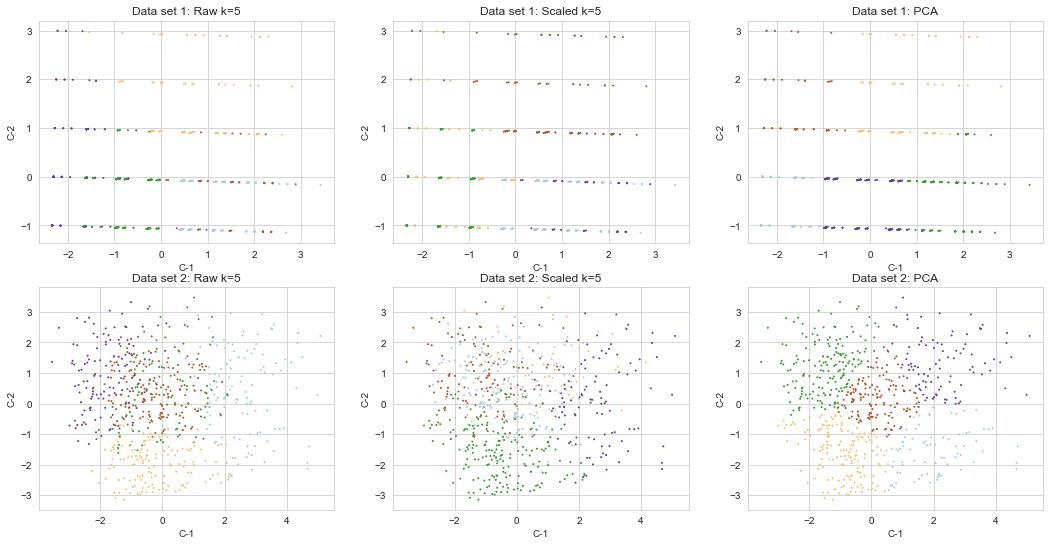

In [185]:
f, axs = plt.subplots(2, 3, figsize=(18, 9))

ax = axs[0, 0]
components1.assign(labels=k5_raw1)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 1: Raw k=5")

ax = axs[0,1]
components1.assign(labels=k5_std1)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 1: Scaled k=5")

ax = axs[0,2]
components1.assign(labels=k5_pca1)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 1: PCA")

ax = axs[1,0]
components2.assign(labels=k5_raw2)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 2: Raw k=5")         

ax = axs[1,1]
components2.assign(labels=k5_std2)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 2: Scaled k=5")    
             
ax = axs[1,2]
components2.assign(labels=k5_pca2)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Data set 2: PCA")   
             
plt.show()

Worrying, these aren't very similar. The fits with more variables seem to do better.

We can use to factor analysis using mixed data model to include **all** our variables.

In [186]:
db_port_pred = db_port.drop(columns=['absences', 'G1', 'G2', 'G3']) #first we create a new dataframe without the dependant variables (grades and absenses)

I then use Max Halford's "Prince" package (https://github.com/MaxHalford/prince)

In [187]:
seed(54321)

famd_estimator = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=None,
    engine='auto',
)

famd_estimator = famd_estimator.fit(db_port_pred) 

components = pd.DataFrame(famd_estimator.transform(db_port_pred), index = db_port_pred.index)

components.columns = ["C-1", "C-2"]



In [190]:
estimator.fit(components)
k5_famd = pd.Series(estimator.labels_,
                       index=components1.index
                      )

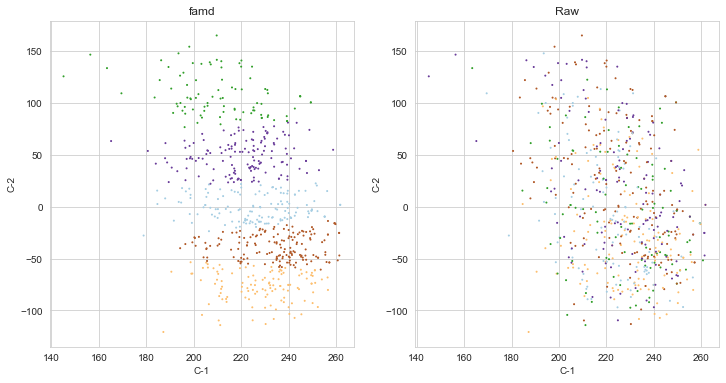

In [194]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
components.assign(labels=k5_famd)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("famd")

ax = axs[1]
components.assign(labels=k5_raw2)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw")

plt.show()